<a href="https://colab.research.google.com/github/DarshanAnand007/SHAP/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explainable AI - Understanding and Trusting Machine Learning Models**

In [ ]:
import pandas as pd
File='dia.csv'
diabetes_data=pd.read_csv(File)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Building A Classifier

In [ ]:
# Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Separate Features and Target Variables
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       162
           1       0.62      0.72      0.67        69

    accuracy                           0.78       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.80      0.78      0.79       231



Now, i am going to integrate the explainability layer into this model to provide more insights into its predictions.

# **SHAP**

SHAP stands for Shapley Additive Explanations. This method aims to explain the prediction of an instance/observation by computing the contribution of each feature to the prediction, and it can be installed using the following pip command.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

Variable Importance with Summary Plot

Variable Importance Plot - Global Interpretation


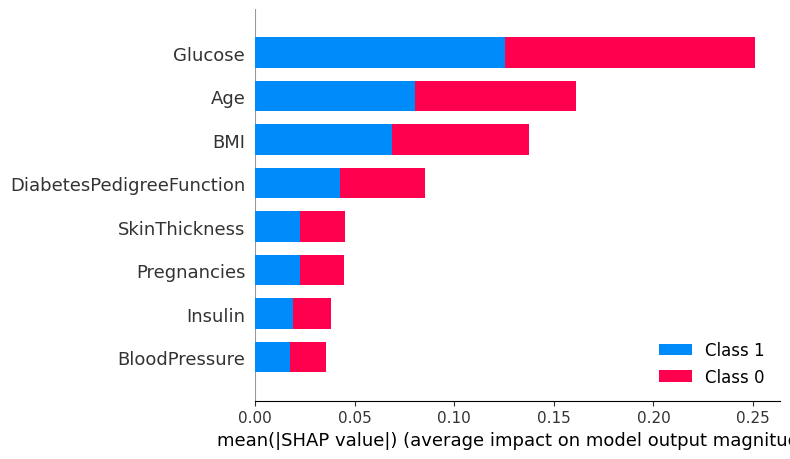

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

Summary Plot on a Specific Label

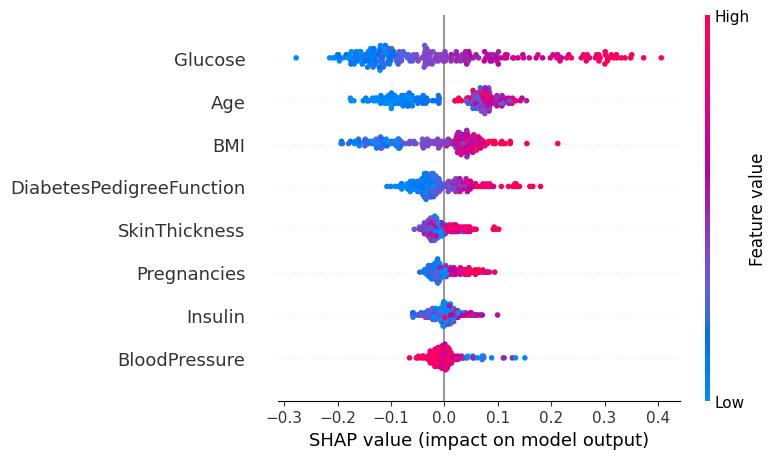

In [ ]:
shap.summary_plot(shap_values[1], X_test)